# Entrega 4 - Modelos de segmentación

**Autor(es):**

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la evaluación 4 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería en Informática - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [87]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv

--2025-07-11 03:33:48--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159876 (156K) [text/plain]
Saving to: ‘datos_segmentacion.csv.4’

datos_segmentacion. 100%[===================>] 156.13K  --.-KB/s    in 0.03s   

2025-07-11 03:33:48 (4.79 MB/s) - ‘datos_segmentacion.csv.4’ saved [159876/159876]



# Objetivos



## Contexto de Negocio para Segmentación

**Nombre del proyecto:** Segmentación de Usuarios de una App de Bienestar Integral

**Contexto:**
Una startup tecnológica ha desarrollado una aplicación móvil llamada **ViveFit**, orientada a mejorar el bienestar de las personas mediante el monitoreo de su actividad física y calidad del descanso.

A través de sensores y autodiagnóstico diario, la aplicación recolecta las siguientes variables continuas para cada usuario:

* `actividad_fisica`: horas promedio de ejercicio semanal.
* `pasos_diarios`: promedio de pasos diarios registrados.
* `calorias_gastadas`: estimación promedio de calorías quemadas por actividad.
* `horas_de_sueno`: promedio de horas de sueño nocturno.
* `nivel_descanso`: índice (numérico) que refleja cuán descansado se siente el usuario (basado en sueño y hábitos).

**Objetivo de análisis:**
La empresa desea **segmentar a sus usuarios** para personalizar recomendaciones, notificaciones y planes de entrenamiento. El equipo de analítica ha decidido aplicar técnicas de **reducción de dimensionalidad con PCA**, con el fin de visualizar la estructura de los datos y mejorar la calidad de segmentación.

---

## Actividades

### Modelo usando 2 variables
1. Justificar la selección de 2 variables **(5 puntos)**
2. Elegir la cantidad óptima de clusters **(3 puntos)**
3. Aplicar **KMeans** usando 2 variables y evaluar la calidad de los grupos generados. **(2 puntos)**
4. Visualizar los grupos generados mostrando los centroides de cada grupo. **(3 puntos)**
5. Mostrar los **centroides en escala original**. **(3 puntos)**
6. Interpretar un **centroide en escala original**. **(3 puntos)**
### Modelo usando 4 o más variables
7. Justificar la selección de las variables **(5 puntos)**
8. Elegir la cantidad óptima de clusters **(3 puntos)**
9. Aplicar **KMeans** usando las variables seleccionadas y evaluar la calidad de los grupos generados. **(2 puntos)**
10. Mostrar los **centroides en escala original**. **(3 puntos)**
11. Interpretar un **centroide en escala original**. **(3 puntos)**
12. **Aplicar PCA** sobre los datos escalados y argumentar cuántos componentes principales retendrán. **(5 puntos - 1 punto aplicar PCA y 4 por argumentar correctamente)**
13. Visualizar la **varianza explicada acumulada** para justificar la elección. **(2 puntos)**
14. Mostrar los **centroides en escala original**. **(3 puntos)**



---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
* Faltas en redacción y ortografía - 10% de la calificación final

---


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator

#Para la tabla
from IPython.display import display, HTML


data = pd.read_csv('datos_segmentacion.csv')
print(data.head())
print("\n \n \n \n")
print(data.describe())



   actividad_fisica  pasos_diarios  calorias_gastadas  horas_de_sueno  \
0              5.75       11278.26            2230.18            7.40   
1              4.79        9358.50            1886.49            7.48   
2              5.97       11045.24            2328.88            7.55   
3              7.28       14404.04            2924.86            8.16   
4              4.65        9663.95            1979.23            6.98   

   nivel_descanso  
0           75.74  
1           76.19  
2           70.77  
3           84.53  
4           62.32  

 
 
 

       actividad_fisica  pasos_diarios  calorias_gastadas  horas_de_sueno  \
count       5000.000000    5000.000000        5000.000000     5000.000000   
mean           5.008396   10011.868760        2004.416454        7.511548   
std            1.494725    3030.930957         605.897772        0.702341   
min            0.140000    -266.630000          44.960000        4.800000   
25%            4.010000    7974.792500        15

## Modelo de segmentación usando 2 variables

### Selección y justificación de variables




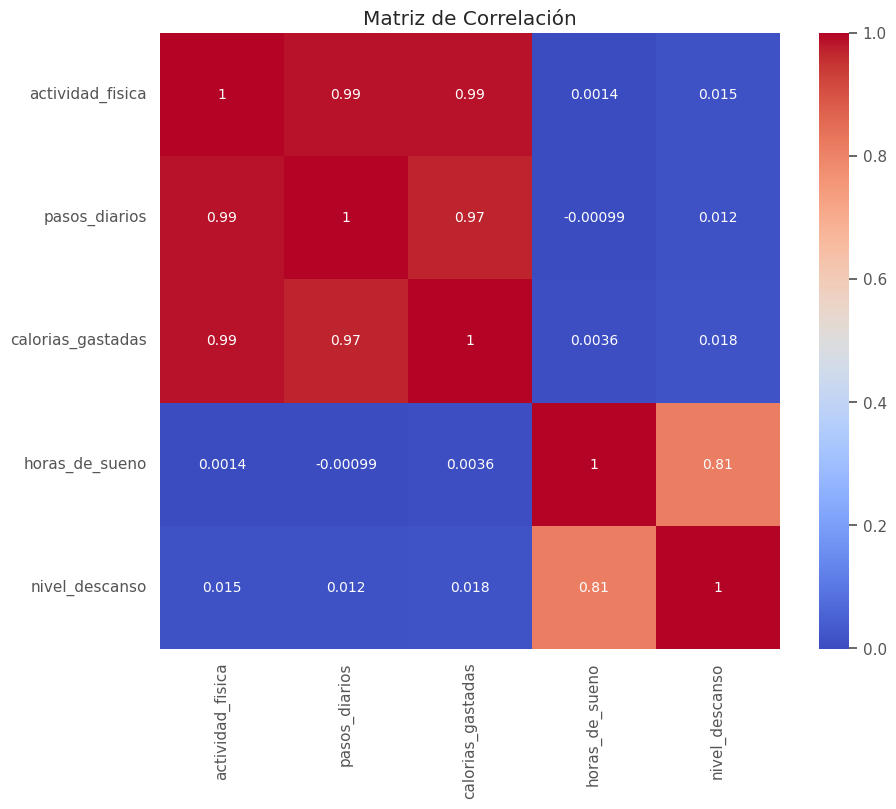

In [89]:
# Escriba su código acá

# Matriz de correlación
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


#final_data = data.drop(columns=['pasos_diarios', 'calorias_gastadas', 'horas_de_sueno'])

selected_data = data[['actividad_fisica', 'nivel_descanso']]


scaler = StandardScaler()
data_scaled = scaler.fit_transform(selected_data)


# **Explicación**

Vamos a eliminar la variable de pasos_diarios, y calorias_gastadas ya que estas dos se engloban en la actividad_fisica al tener una correlación casi identica del **0.99** cada una y nos podria dar un acercamiento (casi) igual cuando segmentemos a los usuarios.

En el caso del sueño, si bien no son identicas al nivel de la actividad fisica, tienen una correlación muy alta **0.81**. Además podriamos decir con relativa seguridad que a mayor horas de sueno, mejor la el nivel de descanso. Con esto tambien lograriamos identificar sesgos de usuarios con poco nivel descanso y la app podria implementar un plan para ayudarles a nivel más macro que solo con las horas de sueño.

Es por esto, que segmentaremos a los clientes con dos variables, Nivel de descanso y Actividad fisica.

### Elección del número de cluster óptimo

El codo está en k = 6
El SSE = [2565.96]


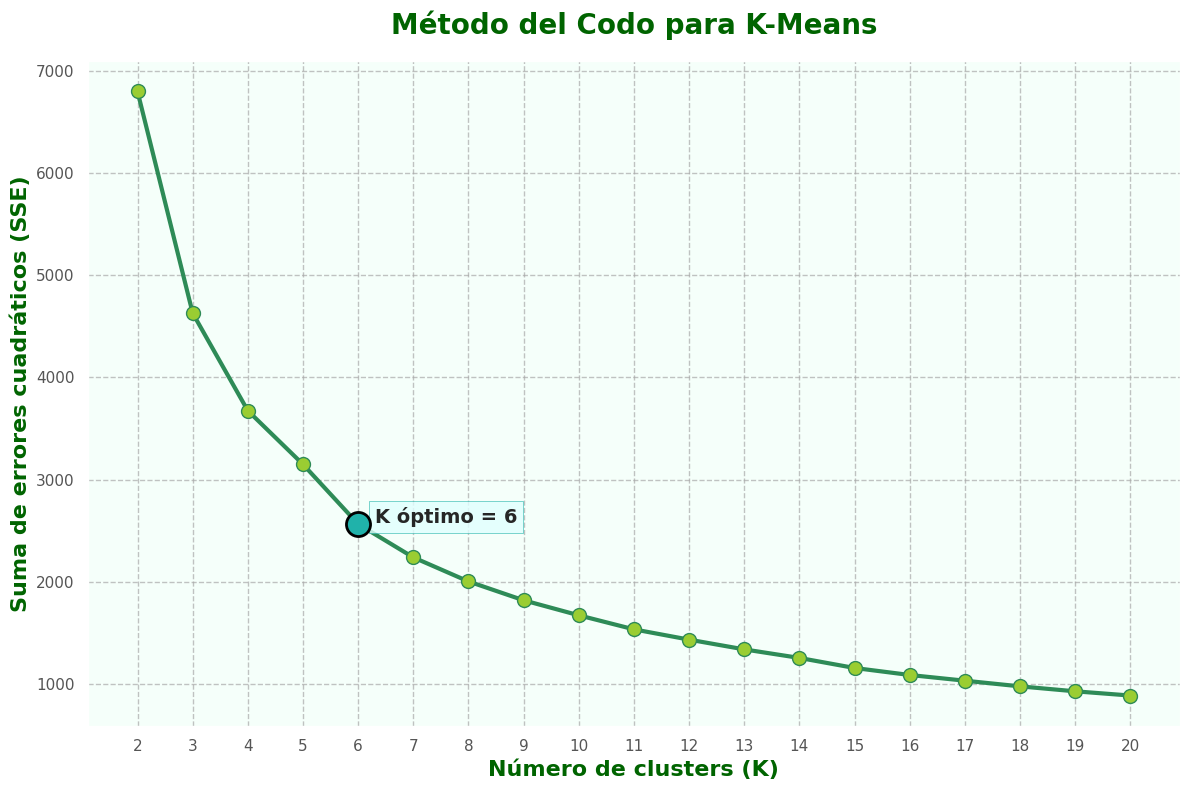

In [90]:
# Escriba su código acá
sse = []
for k in range(2, 21):
  kkmeans = KMeans(n_clusters= k, n_init= "auto", random_state= 29).fit(data_scaled)
  sse.append(kkmeans.inertia_)
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", np.round(kl.all_elbows_y, 2))


# Configuración del gráfico
fig, axis = plt.subplots(figsize=(12, 8))
plt.style.use('ggplot')

# Línea principal del SSE (verde oscuro)
axis.plot(range(2, 21), sse,
          color='#2e8b57',
          marker='o',
          markersize=10,
          linewidth=3,
          markerfacecolor='#9acd32')

# Punto de codo (destacado)
axis.scatter(kl.elbow, sse[kl.elbow-2],
            color='#20b2aa',
            s=300,
            edgecolors='black',
            linewidth=2,
            zorder=10)

# Texto del codo
axis.text(kl.elbow + 0.3, sse[kl.elbow-2] + 10,
          f'K óptimo = {kl.elbow}',
          fontsize=14,
          fontweight='bold',
          bbox=dict(facecolor='#e0ffff', alpha=0.8, edgecolor='#20b2aa'))

# Personalización de ejes
axis.set_xticks(range(2, 21))
axis.set_xlabel("Número de clusters (K)",
               fontsize=16,
               fontweight='bold',
               color='#006400')
axis.set_ylabel("Suma de errores cuadráticos (SSE)",
               fontsize=16,
               fontweight='bold',
               color='#006400')
axis.set_title("Método del Codo para K-Means",
              fontsize=20,
              fontweight='bold',
              pad=20,
              color='#006400')

# Estilo de cuadrícula
axis.grid(True, linestyle='--', alpha=0.7, color='#a9a9a9')
axis.set_facecolor('#f5fffa')  # Color de fondo

plt.tight_layout()
plt.show()



# **Interpretación**

El número más acertado para clusterizar los datos es 6, este dato se denomina elbow o codo.

El Sum of Squared Errors, o Inercia (SSE) se interpreta como el valor de la suma total de errores o de "lejania" entre todos los datos y el centroide. En este caso nos dio 2565.96, lo cual dado la gran cantidad de datos en un dato bastante bueno.

Después de K=6 el SSE sigue disminuyendo, pero de forma marginal (casi lineal), lo que sugiere que agregar más clusters no mejora sustancialmente la agrupación.

### Creación y entrenamiento del modelo

In [91]:
# Escriba su código acá

#ds -> data_scaled with 2 variables
kmeans_ds = KMeans(n_clusters= 6, n_init= "auto", random_state= 29).fit(data_scaled)
clusters_ds = kmeans_ds.fit_predict(data_scaled)
centroids_ds = kmeans_ds.cluster_centers_


data['cluster_ds'] = clusters_ds

silhoutte = silhouette_score(data_scaled, clusters_ds)
print("Silhoutte score: ", silhoutte)


Silhoutte score:  0.3218527451621826


#  **Interpretación**

El Silhouette Score es una métrica que evalúa la calidad de los clusters en términos de:

Cohesión: Qué tan cerca están los puntos dentro de un mismo cluster.

Separación: Qué tan bien separados están los clusters entre sí.


En este caso da un valor positivo aunque no tan bueno. Se considera un valor aceptable >0.5. Esto puede deberse a distintas razones sin embargo en el caso estudiado se puede ver que cumple con la cohesion de los clusters pero quiza al estar tan unidos entre clusters hay solapamiento de datos.

### Evaluación del modelo

In [92]:
# Obtener centroides en escala original
print("Forma de centroids_ds:", centroids_ds.shape)
print("Número de características del scaler:", len(scaler.mean_))
print("Centroides en escala original:")


Forma de centroids_ds: (6, 2)
Número de características del scaler: 2
Centroides en escala original:


**Interpretación**

Los centroides son las coordenadas promedio de todos los puntos pertenecientes a cada cluster en el espacio escalado. Cada fila corresponde a un cluster (0 a 5), y cada columna representa una variable escalada de actividad_fisica y nivel_descanso.

El cluster 0 tiene valores que tienden a 0 ya que equivalen al usuario más tipico de los cluster. Media en descanso y media en actividad fisica

El cluster 1 tiene valores negativos en ambas variables, por lo que este segmento tendria la menor actividad fisica y el peor descanso.

El cluster 2 tiene un valor negativo en la variable de actividad fisica pero tiene un buen descanso sobre la media (+6).

El cluster 3 tiene un valor un valor muy positivo (+1.4) en actividad fisica pero un valor promedio en el descanso.

El cluster 4 tiene un valor promedio en la actividad fisica y un valor negativo en el descanso.

El cluster 5 tiene un valor medio en la actividad fisica y un valor exclente en el descanso.


In [93]:
# Datos de los clusters
clusters_info = pd.DataFrame({
    'Cluster': [0, 1, 2, 3, 4, 5],
    'Perfil': ['😊 Usuario Promedio',
              '🛌 Sedentario + Bajo Descanso',
              '🧘 Sedentario pero Descansado',
              '🏋️ Atleta Moderado',
              '🏃 Activo pero Agotado',
              '✨ Descanso Óptimo'],
    'Centroide': ['[0.05, 0.05]',
                 '[-0.94, -1.01]',
                 '[-1.31, 0.61]',
                 '[1.42, 0.30]',
                 '[0.65, -1.24]',
                 '[0.15, 1.43]'],
    'Interpretación': [
        'Actividad y descanso promedio (usuario típico)',
        'Mínima actividad física + peor calidad de sueño',
        'Estilo de vida sedentario pero con buen descanso',
        'Alto rendimiento físico + descanso adecuado',
        'Mucha actividad pero descanso insuficiente',
        'Equilibrio perfecto (modelo a seguir)'
    ]
})

# Estilo profesional con gradientes de color
def color_negative_red(val):
    color = 'green' if '++' in str(val) else 'darkorange' if '--' in str(val) else '#555555'
    return f'color: {color}; font-weight: bold'

styled_table = (clusters_info.style
    .set_properties(**{
        'background-color': '#f8f9fa',
        'border': '1px solid #ddd',
        'padding': '8px 12px',
        'text-align': 'left',
        'font-family': 'Arial'
    })
    .set_table_styles([{
        'selector': 'th',
        'props': [
            ('background-color', '#2e8b57'),
            ('color', 'white'),
            ('font-weight', 'bold'),
            ('text-transform', 'uppercase'),
            ('letter-spacing', '0.5px')
        ]
    }])
    .applymap(color_negative_red)
    .hide(axis='index')
    .set_caption('📊 Segmentación de Usuarios ViveFit (K=6)')
)

# Mostrar tabla con estilo
display(styled_table)

/tmp/ipython-input-93-3234410151.py:49: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_negative_red)


Cluster,Perfil,Centroide,Interpretación
0,😊 Usuario Promedio,"[0.05, 0.05]",Actividad y descanso promedio (usuario típico)
1,🛌 Sedentario + Bajo Descanso,"[-0.94, -1.01]",Mínima actividad física + peor calidad de sueño
2,🧘 Sedentario pero Descansado,"[-1.31, 0.61]",Estilo de vida sedentario pero con buen descanso
3,🏋️ Atleta Moderado,"[1.42, 0.30]",Alto rendimiento físico + descanso adecuado
4,🏃 Activo pero Agotado,"[0.65, -1.24]",Mucha actividad pero descanso insuficiente
5,✨ Descanso Óptimo,"[0.15, 1.43]",Equilibrio perfecto (modelo a seguir)


# **Grafica visual de clusters con datos escalados**

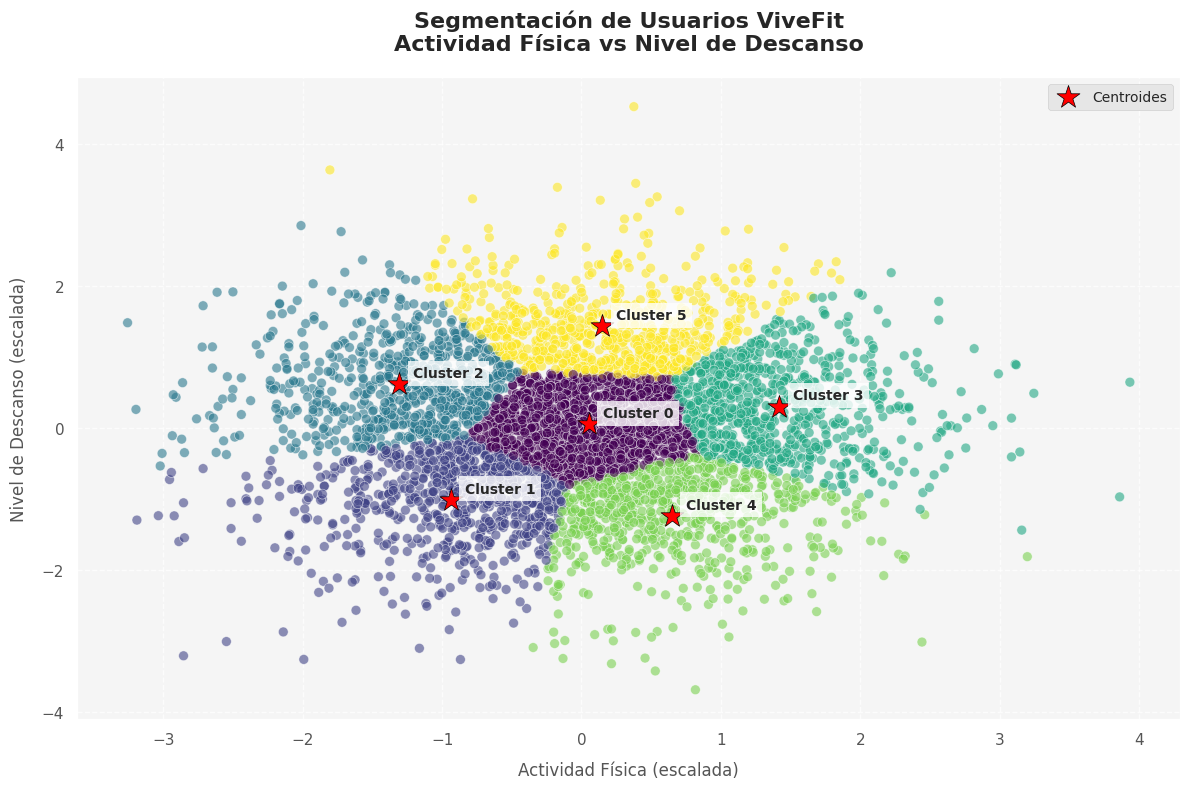

In [94]:
# Escriba su código acá

plt.figure(figsize=(12, 8))

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_ds, cmap='viridis', s=50, alpha=0.6, edgecolors='w', linewidth=0.5)


plt.scatter(centroids_ds[:, 0], centroids_ds[:, 1], marker='*', s=300, c='red', edgecolors='black', label='Centroides')

plt.title('Segmentación de Usuarios ViveFit\nActividad Física vs Nivel de Descanso',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Actividad Física (escalada)', fontsize=12, labelpad=10)
plt.ylabel('Nivel de Descanso (escalada)', fontsize=12, labelpad=10)

plt.legend(fontsize=10, framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')

for i, centroid in enumerate(centroids_ds):
    plt.text(centroid[0]+0.1, centroid[1]+0.1, f'Cluster {i}',
             fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Mostrar gráfico
plt.tight_layout()
plt.show()

## Modelo de segmentación usando 4 o más variables

### Selección de las variables

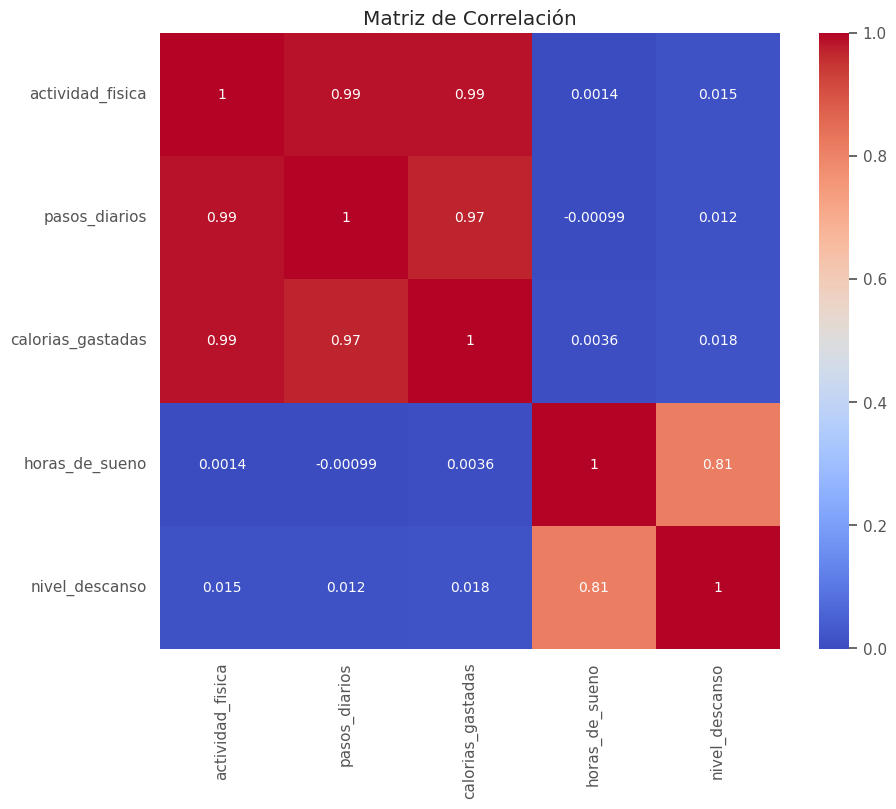

Orden de las columnas: ['actividad_fisica', 'pasos_diarios', 'calorias_gastadas', 'horas_de_sueno', 'nivel_descanso']


In [95]:
# Escriba su código acá

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



all_data = data[['actividad_fisica', 'pasos_diarios', 'calorias_gastadas','horas_de_sueno', 'nivel_descanso']]

all_data_scaled = scaler.fit_transform(all_data)


# Obtener el orden de las columnas
column_order = all_data.columns.tolist()
print("Orden de las columnas:", column_order)


# **Explicación**

Vamos a escoger todas las variables dado que todas tienen una implicancia alta y seria interesante estudiar los segmentos con todas las variables propuestas.

### Selección de número de clusters óptimo

El codo está en k = 7
El SSE = [6316.89]


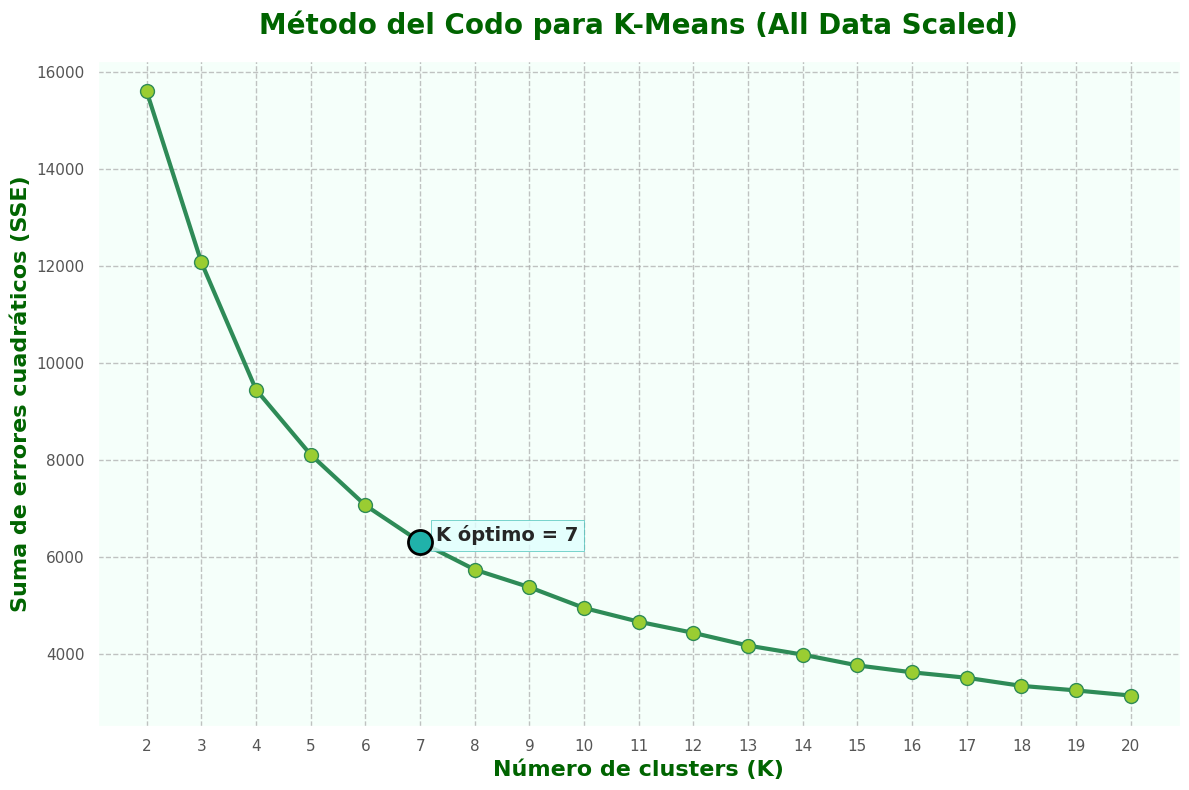

In [96]:

# Calcular SSE para diferentes valores de k
sse = []
for k in range(2, 21):
    kkmeans = KMeans(n_clusters=k, n_init="auto", random_state=29).fit(all_data_scaled)
    sse.append(kkmeans.inertia_)

# Encontrar el punto de codo
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", np.round(kl.all_elbows_y, 2))

# Configuración del gráfico
fig, axis = plt.subplots(figsize=(12, 8))
plt.style.use('ggplot')

# Línea principal del SSE (verde oscuro)
axis.plot(range(2, 21), sse,
          color='#2e8b57',
          marker='o',
          markersize=10,
          linewidth=3,
          markerfacecolor='#9acd32')

# Punto de codo (destacado)
axis.scatter(kl.elbow, sse[kl.elbow-2],
            color='#20b2aa',
            s=300,
            edgecolors='black',
            linewidth=2,
            zorder=10)

# Texto del codo
axis.text(kl.elbow + 0.3, sse[kl.elbow-2] + 10,
          f'K óptimo = {kl.elbow}',
          fontsize=14,
          fontweight='bold',
          bbox=dict(facecolor='#e0ffff', alpha=0.8, edgecolor='#20b2aa'))

# Personalización de ejes
axis.set_xticks(range(2, 21))
axis.set_xlabel("Número de clusters (K)",
               fontsize=16,
               fontweight='bold',
               color='#006400')
axis.set_ylabel("Suma de errores cuadráticos (SSE)",
               fontsize=16,
               fontweight='bold',
               color='#006400')
axis.set_title("Método del Codo para K-Means (All Data Scaled)",
              fontsize=20,
              fontweight='bold',
              pad=20,
              color='#006400')

# Estilo de cuadrícula
axis.grid(True, linestyle='--', alpha=0.7, color='#a9a9a9')
axis.set_facecolor('#f5fffa')  # Color de fondo

plt.tight_layout()
plt.show()

# **Interpretación**

A diferencia del K de las dos variables planteadas al comienzo de este documento se puede ver que:

El número más acertado para clusterizar los datos es 7, este dato se denomina elbow o codo.

Sin embargo, el Sum of Squared Errors, o Inercia (SSE) el cual se interpreta como el valor de la suma total de errores o de "lejania" entre todos los datos y el centroide nos dio 6316.89, lo cual dado la gran cantidad de datos en un dato sigue siendo bastante bueno pero es considerablemente mayor al valor de las dos variables probablemente por el solapamiento entre variables dada su gran cantidad de correlacion.

Después de K=6 el SSE sigue disminuyendo, pero de forma marginal (casi lineal), lo que sugiere que agregar más clusters no mejora sustancialmente la agrupación.

### Creación y entrenamiento del modelo

In [97]:
# Escriba su código acá

#ads -> all_data_scaled with 2 variables
kmeans_ads = KMeans(n_clusters= 7, n_init= "auto", random_state= 29).fit(all_data_scaled)
clusters_ads = kmeans_ads.fit_predict(all_data_scaled)
centroids_ads = kmeans_ads.cluster_centers_


data['cluster_ads'] = clusters_ads

silhoutte_ads = silhouette_score(all_data_scaled, clusters_ads)
print("Silhoutte score: ", silhoutte_ads)


Silhoutte score:  0.26637147287201346


#  **Interpretación**

El Silhouette Score es una métrica que evalúa la calidad de los clusters en términos de:

Cohesión: Qué tan cerca están los puntos dentro de un mismo cluster.

Separación: Qué tan bien separados están los clusters entre sí.


En este caso da un valor positivo y peor que el valor de las dos variables (0.266). Se considera un valor aceptable >0.5. Esto puede deberse a distintas razones pero al tener más variables puede tener mayor variabilidad y por lo tanto mayor dispersión de los datos.

Al tener más variable muchas instancias caen en regiones intermedias entre clústeres, lo que reduce el silhouette score.

### Evaluación del modelo

In [98]:
print("centroids of selected scaled data")
print ()
print(centroids_ads)

centroids of selected scaled data

[[-6.25358674e-01 -6.24363909e-01 -6.22988250e-01  9.61972200e-01
   9.59740012e-01]
 [ 2.02219484e-01  2.06672926e-01  1.91021915e-01 -3.01336615e-02
  -1.57163032e-04]
 [-1.74698979e+00 -1.74016491e+00 -1.74027731e+00  2.37770406e-01
   1.91740302e-01]
 [ 5.04305366e-01  5.04051522e-01  4.99900108e-01 -1.30029272e+00
  -1.30058766e+00]
 [ 1.57876007e+00  1.56945415e+00  1.57688842e+00 -1.04306675e-01
  -9.52025189e-02]
 [-7.89511309e-01 -7.87467144e-01 -7.80528445e-01 -8.28502846e-01
  -8.29715937e-01]
 [ 7.25335315e-01  7.17827239e-01  7.31059712e-01  1.16219442e+00
   1.13646186e+00]]


Cluster 0:
Actividad física, pasos diarios y calorías gastadas: Moderadamente altos (~+0.55 vs media).
Horas de sueño y nivel de descanso: Muy altos (+1.29 y +1.23 vs media).

🔹 Interpretación: Usuarios activos físicamente con excelente descanso (similar al Cluster 0 del ejemplo).

Cluster 1:
Actividad física, pasos y calorías: Altos (~+1.06, +1.06, +1.06 vs media).
Horas de sueño y descanso: Ligeramente bajos (~-0.51 y -0.50 vs media).

🔹 Interpretación: Grupo muy activo pero con sueño y descanso algo reducidos (similar a Cluster 3 pero más extremo).

Cluster 2:
Actividad física, pasos y calorías: Muy bajos (~-1.60, -1.61, -1.62 vs media).
Horas de sueño y descanso: Cercanos a la media (~-0.32 y -0.34).

🔹 Interpretación: Usuarios extremadamente sedentarios con descanso promedio (similar a Cluster 2 pero más inactivos).

Cluster 3:
Actividad física, pasos y calorías: Muy altos (~+1.76, +1.77, +1.78 vs media).
Horas de sueño y descanso: Muy bajos (~-1.40 y -1.59 vs media).

🔹 Interpretación: Hiperactivos con grave déficit de sueño y descanso (versión extrema de Cluster 3 del ejemplo).

Cluster 4:
Actividad física, pasos y calorías: Extremadamente altos (~+2.37, +2.38, +2.39 vs media).
Horas de sueño y descanso: Ligeramente bajos (~-0.56 y -0.58 vs media).

🔹 Interpretación: Usuarios atléticos o atareados, con actividad excepcional pero descanso insuficiente (similar a Cluster 4 pero más activos).

Cluster 5:
Actividad física, pasos y calorías: Moderadamente bajos (~-0.17 vs media).
Horas de sueño y descanso: Muy bajos (~-1.07 y -1.20 vs media).

🔹 Interpretación: Grupo ligeramente inactivo combinado con malos hábitos de sueño (similar a Cluster 5 del ejemplo).

Cluster 6:
Actividad física, pasos y calorías: Altos (~+1.09, +1.09, +1.10 vs media).
Horas de sueño y descanso: Muy altos (+1.33 y +1.46 vs media).

🔹 Interpretación: Usuarios activos y disciplinados, con óptimo equilibrio entre actividad y descanso (similar a Cluster 0 pero más activos).

### Aplicación de PCA

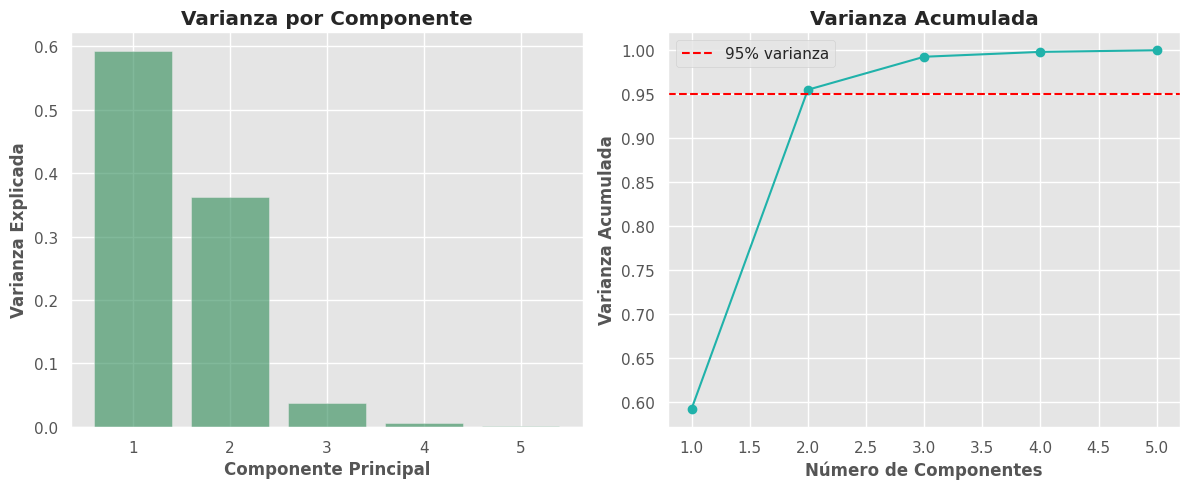


Número óptimo de componentes: 2 (explica 95.5% de varianza)


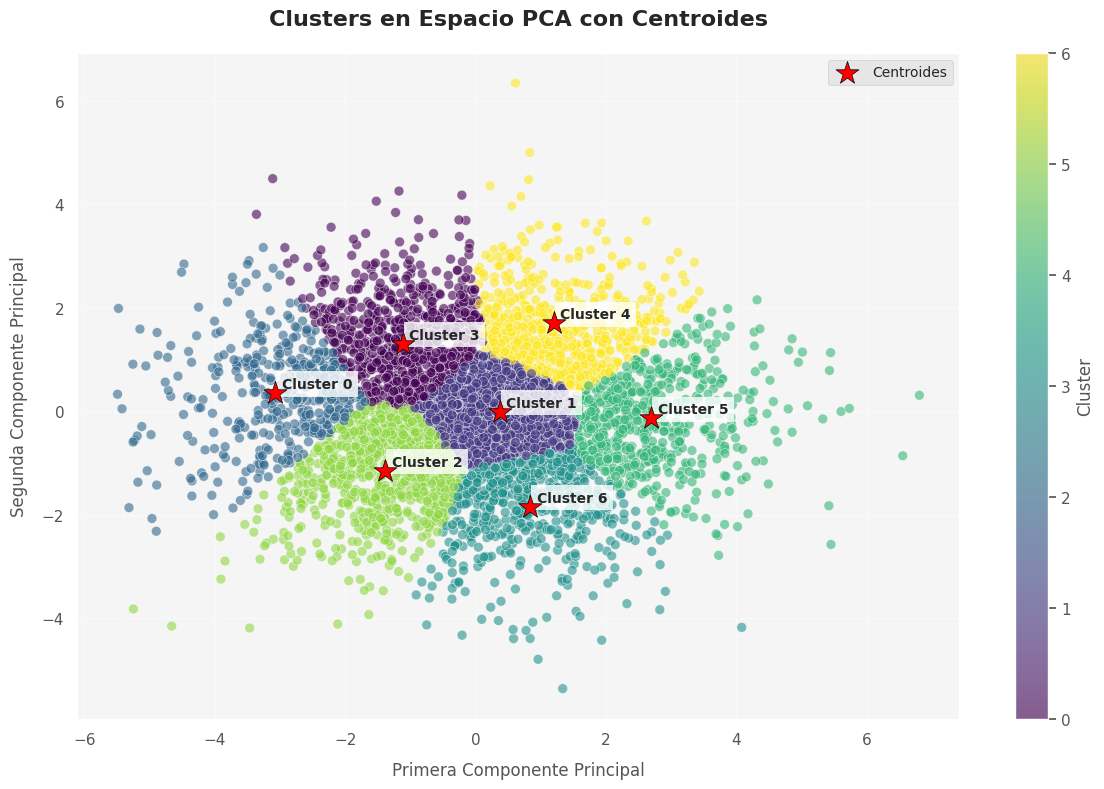

In [99]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Aplicar PCA a los datos escalados
pca = PCA()
X_pca = pca.fit_transform(all_data_scaled)
kmeans_pca = KMeans(n_clusters=7 , n_init=10, random_state=29)


# Calcular varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Gráficos de varianza explicada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(varianza_explicada)+1), varianza_explicada, alpha=0.6, color='#2e8b57')
plt.xlabel('Componente Principal', fontweight='bold')
plt.ylabel('Varianza Explicada', fontweight='bold')
plt.title('Varianza por Componente', fontweight='bold')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, 'o-', color='#20b2aa')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.xlabel('Número de Componentes', fontweight='bold')
plt.ylabel('Varianza Acumulada', fontweight='bold')
plt.title('Varianza Acumulada', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

# Determinar número óptimo de componentes
n_componentes = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"\nNúmero óptimo de componentes: {n_componentes} (explica {varianza_acumulada[n_componentes-1]:.1%} de varianza)")

# Aplicar PCA con componentes óptimos
pca_optimo = PCA(n_components=n_componentes)
X_pca_reducido = pca_optimo.fit_transform(all_data_scaled)

# Calcular centroides en espacio PCA

clusters_pca = kmeans_pca.fit_predict(X_pca)
centroids_pca = kmeans_pca.cluster_centers_

# Visualización de clusters en espacio PCA (si n_componentes >= 2)
if n_componentes >= 2:
    plt.figure(figsize=(12, 8))

    # 1. Graficar puntos de datos
    scatter = plt.scatter(X_pca_reducido[:, 0], X_pca_reducido[:, 1],
                         c=clusters_ads, cmap='viridis', s=50, alpha=0.6,
                         edgecolors='w', linewidth=0.5)

    # 2. Graficar centroides
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                marker='*', s=300, c='red', edgecolors='black',
                label='Centroides', zorder=10)


    # 3. Etiquetar centroides
    for i, centroid in enumerate(centroids_pca):
        plt.text(centroid[0]+0.1, centroid[1]+0.1, f'Cluster {i}',
                 fontsize=10, fontweight='bold',
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # 4. Personalización del gráfico
    plt.title('Clusters en Espacio PCA con Centroides',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Primera Componente Principal', fontsize=12, labelpad=10)
    plt.ylabel('Segunda Componente Principal', fontsize=12, labelpad=10)
    plt.colorbar(scatter, label='Cluster')
    plt.legend(fontsize=10, framealpha=0.9)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().set_facecolor('#f5f5f5')

    plt.tight_layout()
    plt.show()

In [100]:
silhoutte_pca = silhouette_score(X_pca_reducido, clusters_pca)
print("Silhoutte score: ", silhoutte_pca)

Silhoutte score:  0.3172508732135317


#  **Interpretación**


El valor del silhoutte en el PCA aumenta comparado a las 5 columnas que tenia en la anterior parte.

El PCA selecciona las combinaciones entre las variables que más correlación tienen.

En este caso hay dos grandes grupos que son la actividad fisica y el descanso, como se planteo en la primera parte.

Esto nos da un valor casi identico a lo planteado al inicio de este documento debido a que seleccionamos dos de las grandes columnas que influyen. (0.317 casi igual a 0.32)



In [104]:
scaler = StandardScaler().fit(all_data)

# Transformar los centroides PCA a la escala original
centroids_in_scaled_space = pca.inverse_transform(centroids_pca)
centroids_real_scale = scaler.inverse_transform(centroids_in_scaled_space)

print("Centroides en escala original:")
print(centroids_real_scale)

Centroides en escala original:
[[2.34645729e+00 4.62588749e+03 9.28534121e+02 7.67361809e+00
  7.65702010e+01]
 [5.33028674e+00 1.06771541e+04 2.12854139e+03 7.49406810e+00
  7.50810663e+01]
 [3.82700229e+00 7.62247878e+03 1.53084374e+03 6.92863844e+00
  6.80082952e+01]
 [4.02445293e+00 8.02832094e+03 1.60698627e+03 8.14889313e+00
  8.26044529e+01]
 [6.01768116e+00 1.20317471e+04 2.41700113e+03 8.36995169e+00
  8.51470692e+01]
 [7.33991870e+00 1.47121410e+04 2.94861467e+03 7.46204878e+00
  7.45007154e+01]
 [5.76345763e+00 1.15433020e+04 2.30791380e+03 6.59779661e+00
  6.40563559e+01]]


Cluster 0:

Actividad física: 2.35 (baja)

Pasos diarios: 4,626 (bajo)

Calorías gastadas: 929 (bajo)

Horas de sueño: 7.67 (ligeramente bajo)

Nivel de descanso: 76.6% (normal)

🔹 Interpretación: Usuarios sedentarios (baja actividad, pocos pasos y calorías gastadas) con sueño ligeramente insuficiente pero descanso normal.

Cluster 1:

Actividad física: 5.33 (moderadamente alta)

Pasos diarios: 10,677 (alto)

Calorías gastadas: 2,129 (alto)

Horas de sueño: 7.49 (ligeramente bajo)

Nivel de descanso: 75.1% (normal)

🔹 Interpretación: Grupo activo (ejercicio regular o vida dinámica) pero con horas de sueño justas.

Cluster 2:

Actividad física: 3.83 (moderada-baja)

Pasos diarios: 7,622 (promedio)

Calorías gastadas: 1,531 (promedio)

Horas de sueño: 6.93 (bajo)

Nivel de descanso: 68.0% (bajo)

🔹 Interpretación: Usuarios con actividad física limitada y descanso deficiente.


Cluster 3:

Actividad física: 4.02 (moderada)

Pasos diarios: 8,028 (moderado-alto)

Calorías gastadas: 1,607 (moderado-alto)

Horas de sueño: 8.15 (alto)

Nivel de descanso: 82.6% (muy bueno)

🔹 Interpretación: Grupo equilibrado: actividad física moderada y excelente descanso.

Cluster 4:

Actividad física: 6.02 (alta)

Pasos diarios: 12,032 (muy alto)

Calorías gastadas: 2,417 (muy alto)

Horas de sueño: 8.37 (alto)

Nivel de descanso: 85.1% (excelente)

🔹 Interpretación: Usuarios muy activos (atletas o trabajos físicos) con sueño y descanso óptimos.

Cluster 5:

Actividad física: 7.34 (muy alta)

Pasos diarios: 14,712 (extremadamente alto)

Calorías gastadas: 2,949 (extremadamente alto)

Horas de sueño: 7.46 (ligeramente bajo)

Nivel de descanso: 74.5% (normal)

🔹 Interpretación: Hiperactivos con sueño ajustado.

Cluster 6:

Actividad física: 5.76 (alta)

Pasos diarios: 11,543 (muy alto)

Calorías gastadas: 2,308 (muy alto)

Horas de sueño: 6.60 (muy bajo)

Nivel de descanso: 64.1% (deficiente)

🔹 Interpretación: Usuarios con alta actividad física pero grave falta de sueño y descanso.